<a href="https://colab.research.google.com/github/phucdzu/AI/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib pyplot as plt

x= np.avange(50,81,1)
slow= fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=15,label='Slow')
plt.plot

In [ ]:
pip scikit-fuzzy


ERROR: unknown command "scikit-fuzzy"


In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=07d88005a25aad61ce8704c0a69492871cef032e42ed77c8e6f0be1f1d7c14df
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


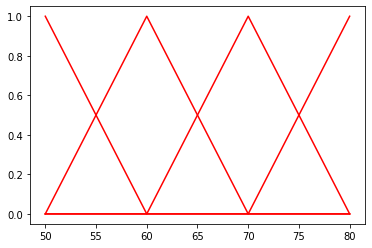

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x= np.arange(50,81,1)
slow= fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
slow= fuzz.trimf(x,[50,60,70])
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
slow= fuzz.trimf(x,[60,70,80])
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
slow= fuzz.trimf(x,[70,80,80])
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot;

20.424083769633505


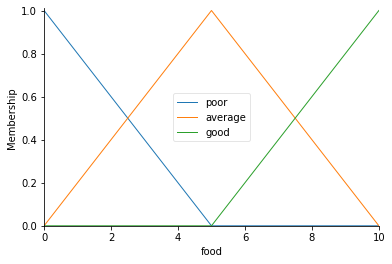

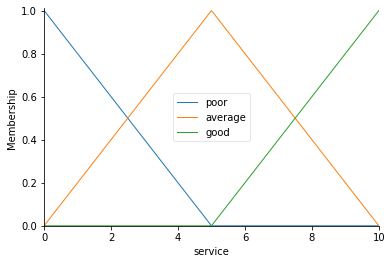

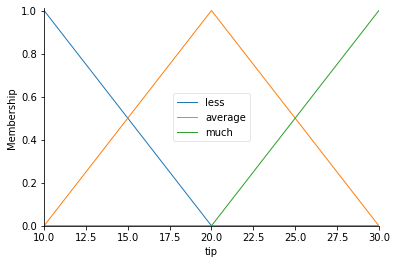

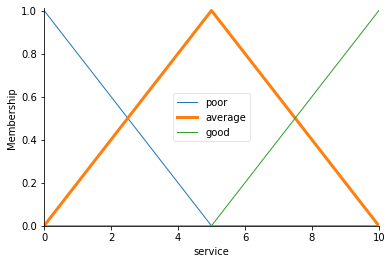

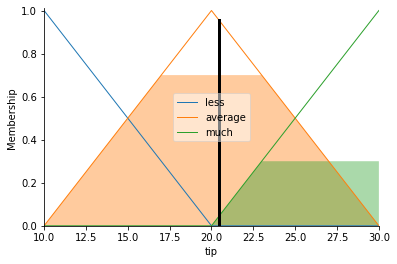

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['average'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()
service['average'].view()


rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['average'])

rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['average'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['average'])

rule7 = ctrl.Rule(food['good'] & service['poor'], tip['less'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['average'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

6.666666666666667


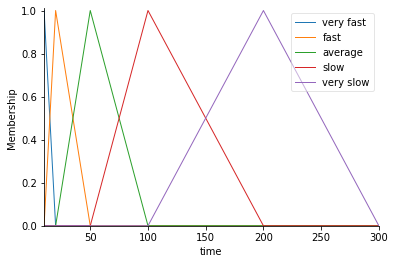

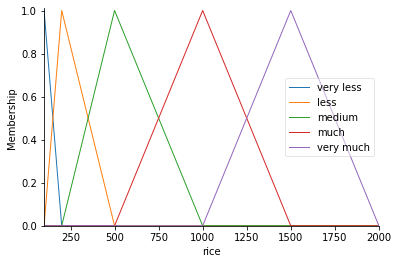

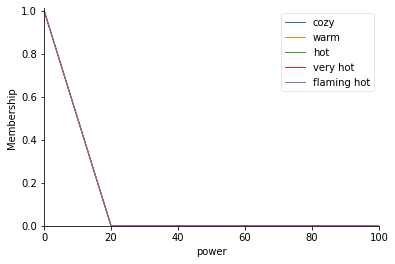

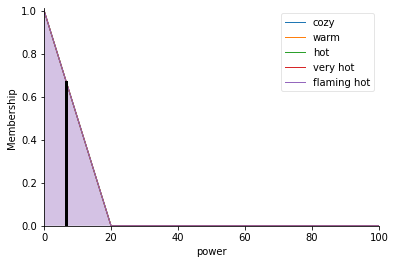

In [29]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,301,1),'time')
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['very fast'] = fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trimf(time.universe,[10,20,50])
time['average'] = fuzz.trimf(time.universe,[20,50,100])
time['slow'] = fuzz.trimf(time.universe,[50,100,200])
time['very slow'] = fuzz.trimf(time.universe,[100,200,300])

rice['very less'] = fuzz.trimf(rice.universe,[100,100,200])
rice['less'] = fuzz.trimf(rice.universe,[100,200,500])
rice['medium'] = fuzz.trimf(rice.universe,[200,500,1000])
rice['much'] = fuzz.trimf(rice.universe,[500,1000,1500])
rice['very much'] = fuzz.trimf(rice.universe,[1000,1500,2000])

power['cozy'] = fuzz.trimf(power.universe,[0,0,20])
power['warm'] = fuzz.trimf(power.universe,[0,0,20])
power['hot'] = fuzz.trimf(power.universe,[0,0,20])
power['very hot'] = fuzz.trimf(power.universe,[0,0,20])
power['flaming hot'] = fuzz.trimf(power.universe,[0,0,20])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['very fast'] & rice['very less'],power['cozy'])
rule2 = ctrl.Rule(time['very fast'] & rice['less'],power['warm'])
rule3 = ctrl.Rule(time['very fast'] & rice['medium'],power['hot'])
rule4 = ctrl.Rule(time['very fast'] & rice['much'],power['very hot'])
rule5 = ctrl.Rule(time['very fast'] & rice['very much'],power['flaming hot'])

rule6 = ctrl.Rule(time['fast'] & rice['very less'],power['cozy'])
rule7 = ctrl.Rule(time['fast'] & rice['less'],power['warm'])
rule8 = ctrl.Rule(time['fast'] & rice['medium'],power['hot'])
rule9 = ctrl.Rule(time['fast'] & rice['much'],power['very hot'])
rule10 = ctrl.Rule(time['fast'] & rice['very much'],power['flaming hot'])

rule11 = ctrl.Rule(time['average'] & rice['very less'],power['cozy'])
rule12 = ctrl.Rule(time['average'] & rice['less'],power['cozy'])
rule13 = ctrl.Rule(time['average'] & rice['medium'],power['warm'])
rule14 = ctrl.Rule(time['average'] & rice['much'],power['hot'])
rule15 = ctrl.Rule(time['average'] & rice['very much'],power['very hot'])

rule16 = ctrl.Rule(time['slow'] & rice['very less'],power['cozy'])
rule17 = ctrl.Rule(time['slow'] & rice['less'],power['cozy'])
rule18 = ctrl.Rule(time['slow'] & rice['medium'],power['warm'])
rule19 = ctrl.Rule(time['slow'] & rice['much'],power['warm'])
rule20 = ctrl.Rule(time['slow'] & rice['very much'],power['hot'])

rule21 = ctrl.Rule(time['very slow'] & rice['very less'],power['cozy'])
rule22 = ctrl.Rule(time['very slow'] & rice['less'],power['cozy'])
rule23 = ctrl.Rule(time['very slow'] & rice['medium'],power['cozy'])
rule24 = ctrl.Rule(time['very slow'] & rice['much'],power['warm'])
rule25 = ctrl.Rule(time['very slow'] & rice['very much'],power['warm'])

powerring_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powerring = ctrl.ControlSystemSimulation(powerring_ctrl)
powerring.input['time'] = 20       
powerring.input['rice'] = 1500      
powerring.compute()
print(powerring.output['power'])
power.view(sim = powerring)